<a href="https://colab.research.google.com/github/FGpramodgupta/GAN/blob/main/vanila_GAN_Implementation_in_pytorch_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
from torch import nn

import math
import matplotlib.pyplot as plt

In [2]:
torch.manual_seed(111)

In [3]:
train_data_length = 1024
train_data = torch.zeros((train_data_length, 2))
train_data[:, 0] = 2 * math.pi * torch.rand(train_data_length)
train_data[:, 1] = torch.sin(train_data[:, 0])
train_labels = torch.zeros(train_data_length)
train_set = [
    (train_data[i], train_labels[i]) for i in range(train_data_length)
]

In [4]:
train_data

tensor([[ 4.4960, -0.9767],
        [ 5.7428, -0.5145],
        [ 1.7710,  0.9800],
        ...,
        [ 4.4772, -0.9725],
        [ 3.2305, -0.0887],
        [ 4.0663, -0.7984]])

In [5]:
train_labels 

tensor([0., 0., 0.,  ..., 0., 0., 0.])

In [6]:
train_data[:, 0]

tensor([4.4960, 5.7428, 1.7710,  ..., 4.4772, 3.2305, 4.0663])

In [7]:
train_data[:, 1]

tensor([-0.9767, -0.5145,  0.9800,  ..., -0.9725, -0.0887, -0.7984])

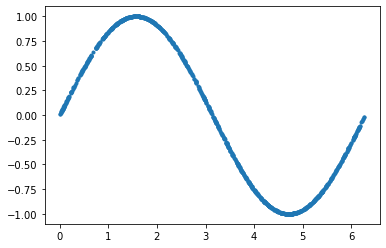

In [8]:
plt.plot(train_data[:, 0], train_data[:, 1], ".")

In [9]:
batch_size = 32
train_loader = torch.utils.data.DataLoader(
    train_set, batch_size=batch_size, shuffle=True
)

In [10]:
class Discriminator(nn.Module):
    def __init__(self):
        super().__init__()
        self.model = nn.Sequential(
            nn.Linear(2, 256),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(256, 128),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(64, 1),
            nn.Sigmoid(),
        )

    def forward(self, x):
        output = self.model(x)
        return output

In [11]:
discriminator = Discriminator()

In [12]:
discriminator


Discriminator(
  (model): Sequential(
    (0): Linear(in_features=2, out_features=256, bias=True)
    (1): ReLU()
    (2): Dropout(p=0.3, inplace=False)
    (3): Linear(in_features=256, out_features=128, bias=True)
    (4): ReLU()
    (5): Dropout(p=0.3, inplace=False)
    (6): Linear(in_features=128, out_features=64, bias=True)
    (7): ReLU()
    (8): Dropout(p=0.3, inplace=False)
    (9): Linear(in_features=64, out_features=1, bias=True)
    (10): Sigmoid()
  )
)

In [13]:
class Generator(nn.Module):
    def __init__(self):
        super().__init__()
        self.model = nn.Sequential(
            nn.Linear(2, 16),
            nn.ReLU(),
            nn.Linear(16, 32),
            nn.ReLU(),
            nn.Linear(32, 2),
        )

    def forward(self, x):
        output = self.model(x)
        return output

generator = Generator()

In [14]:
generator

Generator(
  (model): Sequential(
    (0): Linear(in_features=2, out_features=16, bias=True)
    (1): ReLU()
    (2): Linear(in_features=16, out_features=32, bias=True)
    (3): ReLU()
    (4): Linear(in_features=32, out_features=2, bias=True)
  )
)

In [15]:
lr = 0.001
num_epochs = 10000
loss_function = nn.BCELoss()

In [16]:
discriminator.parameters()

<generator object Module.parameters at 0x7f7b634a1a50>

In [17]:
optimizer_discriminator = torch.optim.Adam(discriminator.parameters(), lr=lr)
optimizer_generator = torch.optim.Adam(generator.parameters(), lr=lr)

In [18]:
for epoch in range(num_epochs):
    for n, (real_samples, _) in enumerate(train_loader):
        # Data for training the discriminator
        real_samples_labels = torch.ones((batch_size, 1))
        latent_space_samples = torch.randn((batch_size, 2))
        generated_samples = generator(latent_space_samples)
        generated_samples_labels = torch.zeros((batch_size, 1))
        all_samples = torch.cat((real_samples, generated_samples))
        all_samples_labels = torch.cat(
            (real_samples_labels, generated_samples_labels)
        )

        # Training the discriminator
        discriminator.zero_grad()
        output_discriminator = discriminator(all_samples)
        loss_discriminator = loss_function(
            output_discriminator, all_samples_labels)
        loss_discriminator.backward()
        optimizer_discriminator.step()

        # Data for training the generator
        latent_space_samples = torch.randn((batch_size, 2))

        # Training the generator
        generator.zero_grad()
        generated_samples = generator(latent_space_samples)
        output_discriminator_generated = discriminator(generated_samples)
        loss_generator = loss_function(
            output_discriminator_generated, real_samples_labels
        )
        loss_generator.backward()
        optimizer_generator.step()

        # Show loss
        if epoch % 10 == 0 and n == batch_size - 1:
            print(f"Epoch: {epoch} Loss D.: {loss_discriminator}")
            print(f"Epoch: {epoch} Loss G.: {loss_generator}")

Epoch: 0 Loss D.: 0.19172890484333038
Epoch: 0 Loss G.: 2.205277681350708
Epoch: 10 Loss D.: 0.6455698013305664
Epoch: 10 Loss G.: 0.8941397666931152
Epoch: 20 Loss D.: 0.6456489562988281
Epoch: 20 Loss G.: 0.8919371366500854
Epoch: 30 Loss D.: 0.6728670597076416
Epoch: 30 Loss G.: 0.8778129816055298
Epoch: 40 Loss D.: 0.6325268745422363
Epoch: 40 Loss G.: 0.702785849571228
Epoch: 50 Loss D.: 0.6204653978347778
Epoch: 50 Loss G.: 0.9101289510726929
Epoch: 60 Loss D.: 0.5522268414497375
Epoch: 60 Loss G.: 0.9904371500015259
Epoch: 70 Loss D.: 0.5903010964393616
Epoch: 70 Loss G.: 1.0225229263305664
Epoch: 80 Loss D.: 0.6235218048095703
Epoch: 80 Loss G.: 0.9041709899902344
Epoch: 90 Loss D.: 0.6744253039360046
Epoch: 90 Loss G.: 0.8965575695037842
Epoch: 100 Loss D.: 0.6881913542747498
Epoch: 100 Loss G.: 1.1556098461151123
Epoch: 110 Loss D.: 0.6485523581504822
Epoch: 110 Loss G.: 0.7771891951560974
Epoch: 120 Loss D.: 0.6140218377113342
Epoch: 120 Loss G.: 0.8845400214195251
Epoch: 13

In [28]:
latent_space_samples = torch.randn(500, 2)
generated_samples = generator(latent_space_samples)

In [29]:
generated_samples

tensor([[ 1.2653e+00,  9.1591e-01],
        [ 3.3205e+00, -1.9338e-01],
        [ 3.2331e+00, -8.9010e-02],
        [ 8.2237e-01,  7.1105e-01],
        [ 9.0205e-01,  7.5146e-01],
        [ 4.6518e+00, -9.8918e-01],
        [ 2.0922e+00,  8.6072e-01],
        [ 1.7253e+00,  9.6844e-01],
        [ 4.1198e+00, -8.3278e-01],
        [ 1.5241e+00,  9.7427e-01],
        [ 4.8482e+00, -9.7376e-01],
        [ 4.0228e+00, -7.6495e-01],
        [ 3.3198e+00, -1.3914e-01],
        [ 5.2796e+00, -8.0980e-01],
        [ 3.4202e+00, -2.9110e-01],
        [ 6.1698e+00, -1.1031e-01],
        [ 4.2771e+00, -8.9259e-01],
        [ 4.1179e+00, -8.3219e-01],
        [ 1.8536e+00,  9.5237e-01],
        [ 2.7814e+00,  3.7638e-01],
        [ 5.3417e+00, -7.7814e-01],
        [ 5.7265e+00, -4.5444e-01],
        [ 4.4425e-01,  4.3231e-01],
        [ 2.4418e+00,  6.3078e-01],
        [ 3.2882e+00, -1.3306e-01],
        [ 4.9687e+00, -9.6298e-01],
        [ 4.6597e+00, -9.9040e-01],
        [ 3.8410e+00, -6.489

In [30]:
generated_samples.detach()

tensor([[ 1.2653e+00,  9.1591e-01],
        [ 3.3205e+00, -1.9338e-01],
        [ 3.2331e+00, -8.9010e-02],
        [ 8.2237e-01,  7.1105e-01],
        [ 9.0205e-01,  7.5146e-01],
        [ 4.6518e+00, -9.8918e-01],
        [ 2.0922e+00,  8.6072e-01],
        [ 1.7253e+00,  9.6844e-01],
        [ 4.1198e+00, -8.3278e-01],
        [ 1.5241e+00,  9.7427e-01],
        [ 4.8482e+00, -9.7376e-01],
        [ 4.0228e+00, -7.6495e-01],
        [ 3.3198e+00, -1.3914e-01],
        [ 5.2796e+00, -8.0980e-01],
        [ 3.4202e+00, -2.9110e-01],
        [ 6.1698e+00, -1.1031e-01],
        [ 4.2771e+00, -8.9259e-01],
        [ 4.1179e+00, -8.3219e-01],
        [ 1.8536e+00,  9.5237e-01],
        [ 2.7814e+00,  3.7638e-01],
        [ 5.3417e+00, -7.7814e-01],
        [ 5.7265e+00, -4.5444e-01],
        [ 4.4425e-01,  4.3231e-01],
        [ 2.4418e+00,  6.3078e-01],
        [ 3.2882e+00, -1.3306e-01],
        [ 4.9687e+00, -9.6298e-01],
        [ 4.6597e+00, -9.9040e-01],
        [ 3.8410e+00, -6.489

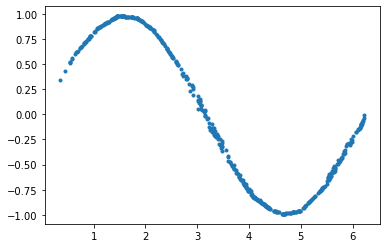

In [31]:
generated_samples = generated_samples.detach()
plt.plot(generated_samples[:, 0], generated_samples[:, 1], ".")

In [32]:
import torch
from torch import nn

import math
import matplotlib.pyplot as plt
import torchvision
import torchvision.transforms as transforms

In [33]:
torch.manual_seed(111)

In [34]:
device = ""
if torch.cuda.is_available():
    device = torch.device("cuda")
else:
    device = torch.device("cpu")

In [35]:
transform = transforms.Compose(
    [transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))]
)

In [36]:
train_set = torchvision.datasets.MNIST(
    root=".", train=True, download=True, transform=transform
)

HTTPError: ignored